<p style="font-family:Roboto; font-size: 28px; color: magenta"> Python for OpenCV: How to Check for Blurry Images in Your Dataset Using the Laplacian Method</p>

In [ ]:
'''The Laplacian method is a mathematical technique used primarily in image processing to detect edges in an image'''

'OpenCV, short for Open Source Computer Vision Library, is an open-source computer vision and \nmachine learning software library. \nOriginally developed by Intel, it is now maintained by a community of developers under the OpenCV Foundation'

<p style="font-family:consolas; font-size: 24px; color: olive"> Key Concepts of the Laplacian Method:</p>

<p style="font-family:consolas; font-size: 24px; color: olive"> 1. Laplacian Operator:</p>

<p style="font-family:consolas; font-size: 24px; color: olive"> 2. Edge Detection:</p>

<p style="font-family:consolas; font-size: 24px; color: olive"> 3. Blurriness Detection:</p>

In [ ]:
'''
Why Use the Laplacian Method for Blur Detection?
The primary advantage of the Laplacian method is its simplicity and effectiveness. 
By calculating the variance of the Laplacian of an image, 
you can quantify the amount of detail (or lack thereof) present in the image
'''

<p style="font-family:Roboto; font-size: 22px; color: orange; text-decoration-line: overline; "> Part: _Important types of blurring:</p>

In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

<p style="font-family:Roboto; font-size: 22px; color: orange; text-decoration-line: overline; "> Part: _Load the CIFAR-10 Dataset</p>

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

 48996352/170498071 ━━━━━━━━━━━━━━━━━━━━ 7:20 4us/step

<p style="font-family:Roboto; font-size: 22px; color: orange; text-decoration-line: overline; "> Part: _Define the Blurriness Detection Function</p>

In [4]:
'''The function converts the image to grayscale, applies the Laplacian operator, and calculates the variance.
If the variance is below a certain threshold, the image is considered blurry.'''
def is_blurry(image, threshold=100.0):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute the Laplacian of the image and then the variance
    laplacian_var = cv2.Laplacian(gray_image, cv2.CV_64F).var()

    return laplacian_var < threshold, laplacian_var

<p style="font-family:Roboto; font-size: 22px; color: orange; text-decoration-line: overline; "> Part: _Analyze the Dataset</p>

In [5]:
'''Initialize lists to store blurry and non-blurry images. 
Then, iterate over the dataset, convert each image from RGB to BGR (since OpenCV uses BGR format), 
and check if the image is blurry using the is_blurry function'''
# Initialize lists to store images
blurry_images = []
not_blurry_images = []

# Analyze the dataset
for i in range(x_train.shape[0]):
    # Convert the image from RGB to BGR (OpenCV uses BGR format)
    image = cv2.cvtColor(x_train[i], cv2.COLOR_RGB2BGR)

    # Check if the image is blurry
    is_blur, _ = is_blurry(image)

    if is_blur:
        blurry_images.append(image)
    else:
        not_blurry_images.append(image)

<p style="font-family:Roboto; font-size: 22px; color: orange; text-decoration-line: overline; "> Part: _Output the Results</p>

In [6]:
'''After processing the entire dataset, output the total number of images, the count of blurry and non-blurry images, 
and the percentage of blurry images.'''
# Output the results
total_images = x_train.shape[0]
blurry_count = len(blurry_images)
not_blurry_count = len(not_blurry_images)

print(f"Total images: {total_images}")
print(f"Blurry images: {blurry_count}")
print(f"Not blurry images: {not_blurry_count}")
print(f"Percentage of blurry images: {blurry_count / total_images * 100:.2f}%")

Total images: 50000
Blurry images: 13
Not blurry images: 49987
Percentage of blurry images: 0.03%


<p style="font-family:Roboto; font-size: 22px; color: orange; text-decoration-line: overline; "> Part: _Visualize the Results</p>

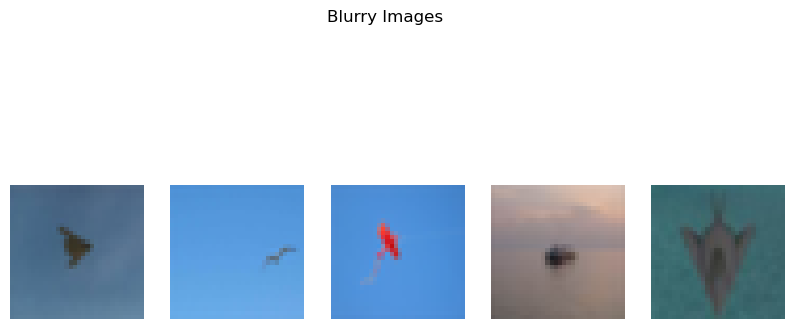

In [7]:
# Plot a few blurry and not blurry images to compare
def plot_images(images, title, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Plot blurry images
if blurry_images:
    plot_images(blurry_images, 'Blurry Images', min(5, len(blurry_images)))